In [2]:
import math
import random 
import time
import unittest
from state import AbstractState as State
from state import AbstractAction as Action
from mcts  import *

# Mini-Pset: Monte Carlo Tree Search for Collaboration


---

# Part 1: Introduction to MCTS

### Structure of this Mini-Pset

### MCTS Algorithm 

### AlphaGo Zero

### Gomoku Game


## Implementation of MCTS

We have provided a Gomoku game which is steill in progress. The black is at great advantage, and your job is to help it turn advantage into victory.

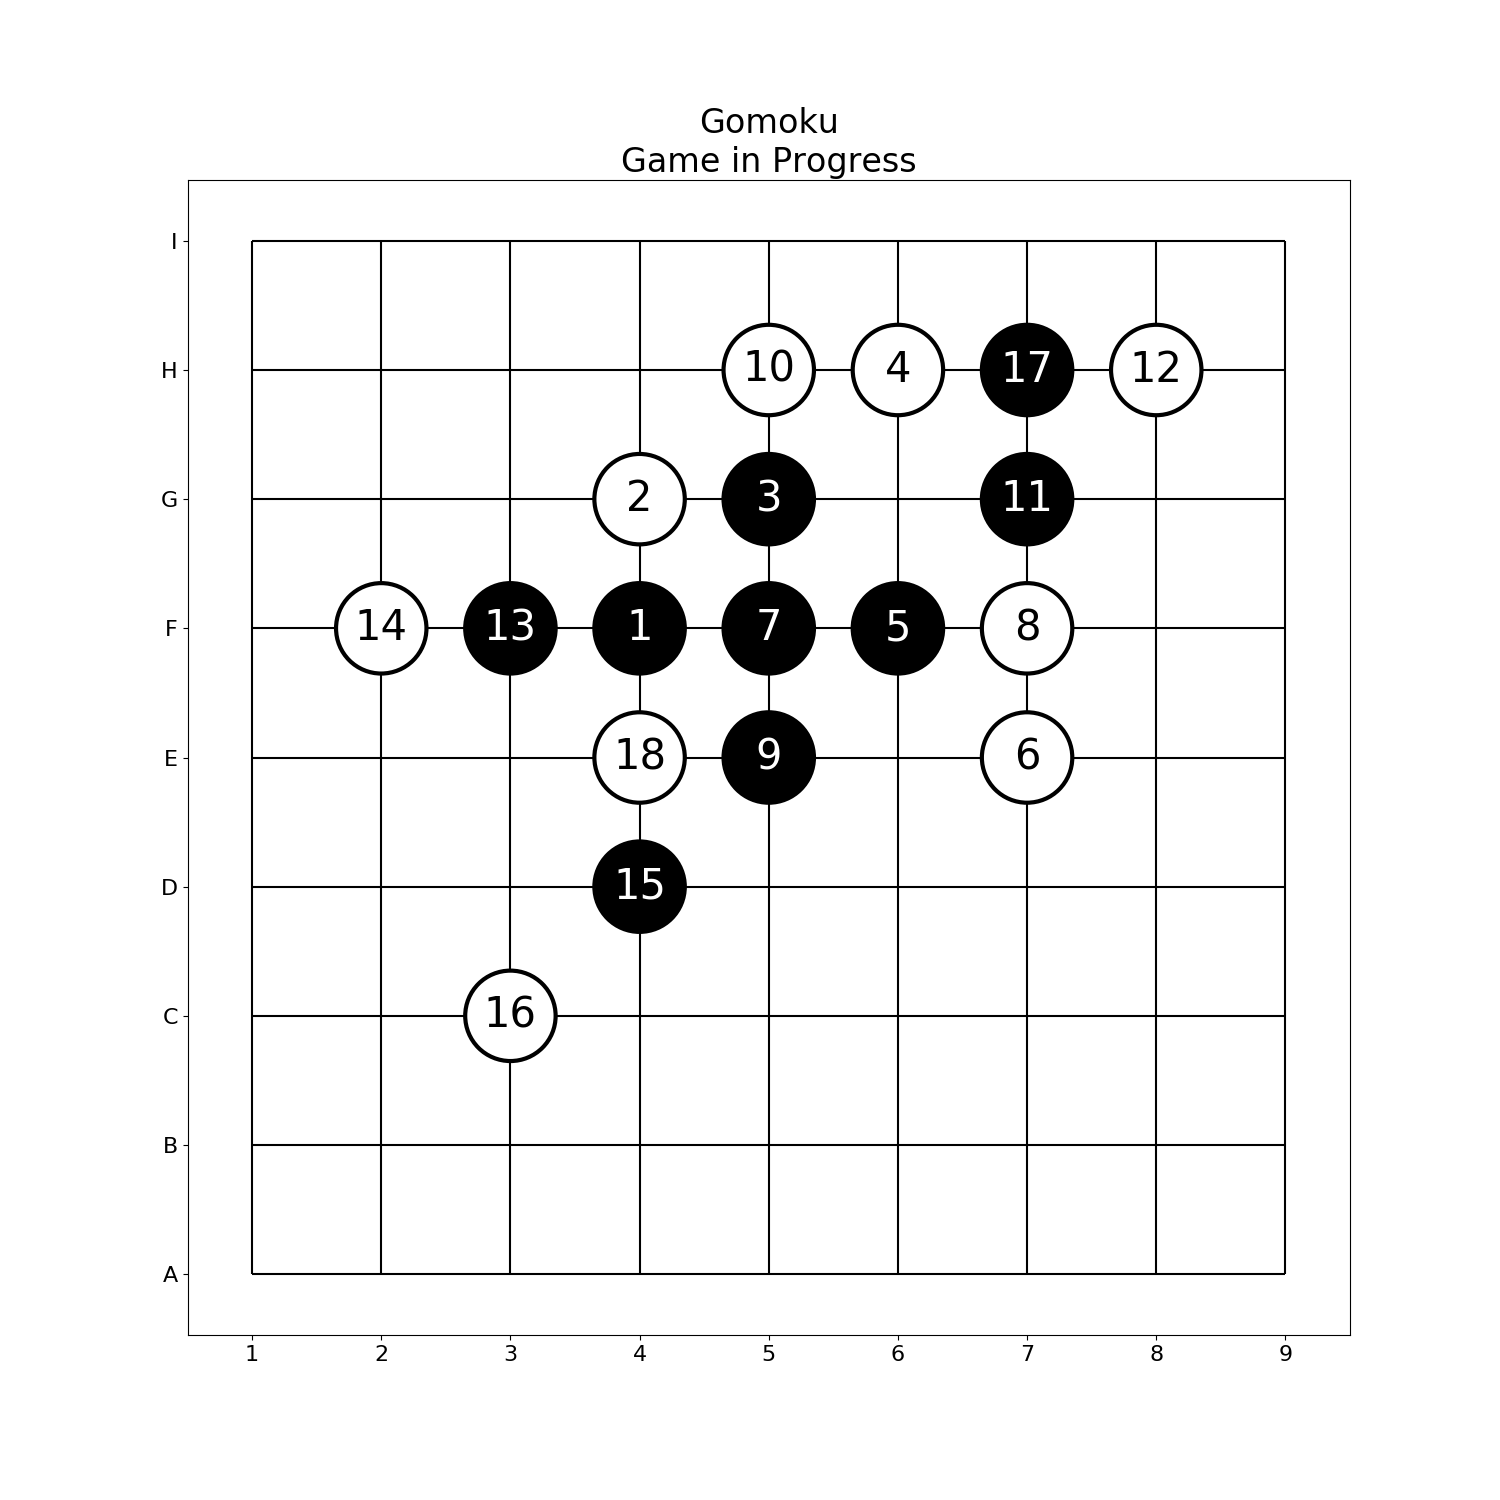

You are now asked to finish several key components in Monte Carlo Tree Search, namely the *select*, *expand*, *default_rollout_policy*, *backpropagate*, and *execute_round* functions. You will need to use the *Node* class we have defined.

A *Node* object has the following useful member variables:
1. *children*: a dictionary that maps Action objects to Node objects
1. *tot_reward*: a float of reward that has been back-propagated to this node
1. *num_samples*: an int of number of samples that has been back-propagated to this node

the following properties:
1. *state*: a State objects corresponds to the node
1. *parent*: a Node object that is the parent
1. *unused_edges*: a list of Action objects that have not contributed to building child nodes
1. *is_terminal*: a bool representing whether or not the State object associated with the node is a terminal state
1. *depth*: an int of the depth of the node. The depth of a root node, which has *None* as its parent, is 1.
1. *is_expanded*: a bool representing whether all possible actions and associated child nodes have been added to the *children* dictionary

and the following methods:
1. *add_child*(*action*): if the action is in the list *unused_edges*, then build a *Node* object *child* and add *action*: *child* to *children*, and returns *child*

When making random selection from a list of variables, use the *random.choice* function.



## Implementation: *Selection* (10 points)

Selecting which node to expand is based on choosing the node with the maximal upper confidence bound (UCB):
$$UCB=\frac{\text{reward}}{\text{number of samples of the child node}}+\sqrt{2\frac{\ln({\text{number of samples of the parent node})}}{\text{number of samples of the child node}}}$$
where the first term is the average reward per sample and is the exploitation term; the second term, coming from Hoeffding's inequality, will perfer unexplored choices and is the exploration term.

Later when we are choosing the best strategy (not in simulation), we need to choose the action that brings the maximal reward instead of UCB, so a good practice in implementation is to make the second term vanishable:
$$UCB=\frac{\text{reward}}{\text{number of samples of the child node}}+exploration\_const*\sqrt{2\frac{\ln({\text{number of samples of the parent node})}}{\text{number of samples of the child node}}}$$

In [1]:
def select(node: Node, exploration_const: float = 1.0) -> (Action, Node):
    """ Select the best child node based on UCB; if there are multiple
        child nodes with the max UCB, randomly select one
    :param node: The parent node
    :param exploration_const: The exploration constant in UCB formula
    :return: The action and the corresponding child node it leads to
    """
    best_ucb = -math.inf
    best_actions = []
    for action, child in node.children.items():
        
        # Insert your code here
        
    best_action = random.choice(best_actions)
    return best_action, node.children[best_action]

IndentationError: expected an indented block (<ipython-input-1-87737e79a9de>, line 14)

## Implementation: *Expansion* (10 points)
Suppose you have selected a node and that node is not a terminal node, you need to randomly select an action from the list of untaken actions, add the associated new child node to the *children* dictionary and return the child node.

In [ ]:
def expand(node: Node) -> Node:
    """ Randomly select an untried action and create a child node based on it
        Return the new child node
    :param node: The parent node
    :return: The child node
    """
    if node.is_expanded:
        raise Exception("Should not expand a node that has already"
                        " been expanded")
    
    # Insert your code here
    

## Implementation: *Simulation* (10 points)

The default rollout policy is to keep randomly selecting an action from the available ones until a terminal state is reached.

A *State* object has a property *is_terminal* to represent whether a it is a terminal state, another property *possible_actions* which is a list of *Action* objects, and a member method *execute_action* which takes an *Action* object as input and returns a copy of a new state.

In [ ]:
def default_rollout_policy(state: State) -> float:
    """ The default policy for simulation is to randomly (uniform distribution)
        select an action to update the state and repeat the simulation until
        a terminal state is reached
    :param state: The starting state
    :return: The reward at the terminal state
    """
    
    # Insert your code here

## Implementation: *Back Propagation* (10 points)
After simulation is performed, the next thing is to update the visit counts and rewards for relevant nodes.

In [ ]:
def backpropagate(node: Node, reward: float = 0.0) -> None:
    """ Propagate the reward and sample count from the specified node
        back all the way to the root node (the node with None as parent)
    :param node: The node wheresimulation is performed and the reward is evaluated
    :param reward: The reward at the node
    """
    
    # Insert your code here

## Implementation: *Execute Round*
Run the following code which combines the four functions above.

In [ ]:
def execute_round(root: Node, rollout_policy=default_rollout_policy,
                  max_tree_depth: int = 15) -> None:
    """ Perform selection, expansion, simulation and backpropagation
    """
    cur = root
    while cur.is_expanded and cur.depth < max_tree_depth:
        act, cur = select(cur, exploration_const=1.0)
    simulation_node = expand(cur) if max_tree_depth > cur.depth else cur
    reward = rollout_policy(simulation_node.state)
    backpropagate(simulation_node, reward)

## Implementation: *Monte Carlo Search Tree*
Run the code below to finish the Monte Carlo Search Tree.

In [ ]:
class MonteCarloSearchTree:
    def __init__(self, initial_state: State, samples: int = 1000,
                 exploration_const: float = 1.0, max_tree_depth: int = 10,
                 rollout_policy=default_rollout_policy):
        """ Create a MonteCarloSearchTree object
        :param initial_state: The initial state
        :param samples: The number of samples to generate to obtain the best
                action
        :param exploration_const: The constant on the second term of UCB
        :param max_tree_depth: The maximal allowable number of nodes in the tree
        :param rollout_policy: The simulation function
        :type: A function that takes a state as input, perform simulation until
                a terminal state, and returns the reward of the final state
        """
        if samples <= 0 or max_tree_depth <= 1:
            raise ValueError("The number of samples must be positive")
        self._max_samples = samples
        self._exploration_const = exploration_const
        self._rollout = rollout_policy
        self._root = Node(initial_state)
        self._max_tree_depth = max_tree_depth

    def search_for_actions(self, search_depth: int = 1) -> list:
        """ With given initial state, obtain the best actions to take by MCTS
        :param search_depth: How many steps of actions are wanted
        :return: The best actions
        :rtype: A list of AbstractAction objects
        """
        for _ in range(self._max_samples):
            execute_round(self._root, max_tree_depth=self._max_tree_depth)
        actions = []
        cur_node = self._root
        for _ in range(search_depth):
            if cur_node.is_terminal:
                break
            else:
                action, child = select(cur_node, exploration_const=0.0)
                cur_node = child
                actions.append(action)
        return actions

    def update_root(self, action: Action) -> "MonteCarloSearchTree":
        """ Update the root node to reflect the new state after an action is
            taken
        :param action: The action that brings a new state
        """
        if action in self._root.children:
            new_root = self._root.children[action]
        else:
            new_root = self._root.add_child(action)
        self._root.remove_child(new_root)
        self._root = new_root
        return self

## Written Question: *MCTS with Heuristics* (10 points)
Now you have implemented the MCTS algorithm, you should be ready to use it run it on the Gomoku problem. Note that the execution might take 3-5 minutes. To ensure that the simulation terminates in a reasonable number of steps and to make sure that the results observed are similar, we have fixed the random seed.

In [ ]:
simulate_with_black_sample_arbitrarily()

Does the result look good? Start thinking about why (you do not need to answer right now).

In the simulation conducted above, the MCTS algorithm, at each step, simply randomly select an unoccupied position as the next move. However, there can be heuristics involved. In the next simulation, the algorithm will only consider positions with at least one occupied neighbor, instead of all unoccupied locations.

In [ ]:
simulate_with_black_sample_neighborhood()

Which strategy generates a better result? Explain why. Could you come up with some potential methods to improve the performance of MCTS in Gomoku games?

<font color='darkgreen'>Enter your answer here.</font>

---
# Part 2: MCTS for Collaboration

### AUV Value Collection Example


---
## Implement: *Reward* (10 points)

---
## Implement: *Is Terminal State* (10 points)

--- 
## Implement: *Possible Actions* (10 points)

---
## Implement: *Take Action* (10 points)

---
## Written Question: *Limitations of MCTS* (10 points)